In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units
from astroquery.skyview import SkyView
import numpy as np
from astropy import units as u
from matplotlib.colors import LogNorm


In [2]:
dataset=pd.read_csv('galaxias_2.csv')


In [3]:
df_elipticas = dataset[dataset["elliptical"] == 1]
df_spiral = dataset[dataset["spiral"] == 1]
df_uncertain =dataset[dataset["uncertain"] == 1]

In [4]:
coords_gx = SkyCoord(df_spiral.ra.iloc[2], df_spiral.dec.iloc[2], unit=(u.deg,u.deg))
img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi','SDSSr','SDSSu', 'SDSSz'])

In [5]:
color_maps = {
'SDSS-g': 'Blues',
'SDSS-u': 'Greens',
'SDSS-r': 'Reds',
'SDSS-i': 'Oranges',
'SDSS-z': 'Purples'
}

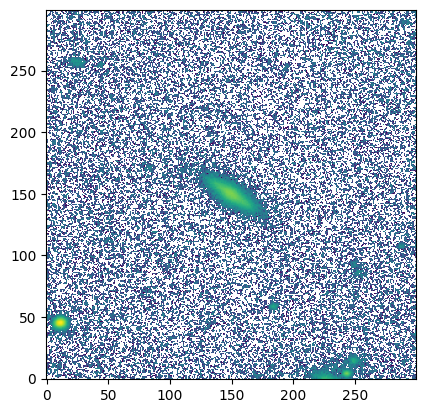

In [6]:
plt.imshow(img[0][0].data, cmap=color_maps.get('SDSSg'), norm=LogNorm(),origin='lower')


SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


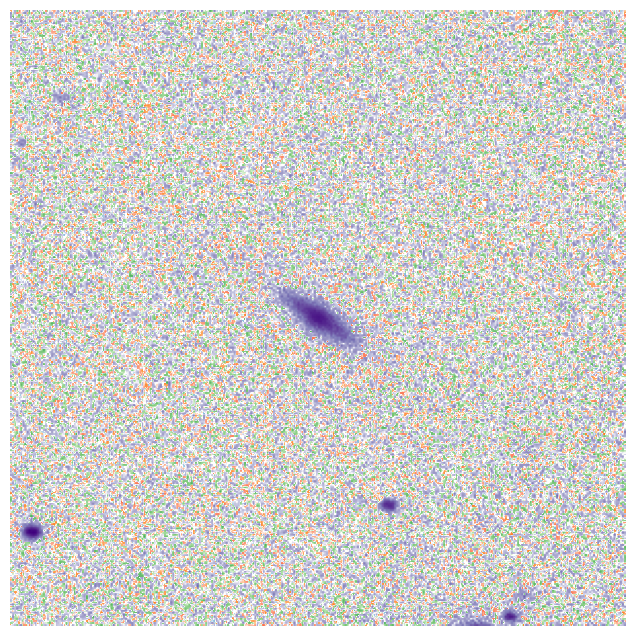

In [7]:
#### Quality control
initial = 0
for i in range(len(img)):
    band = img[i][0].header['SURVEY'].strip()
    print(band)
    cmap = color_maps.get(band, 'Blues')
    plt.imshow(img[i][0].data, cmap=cmap, norm=LogNorm(), origin='lower')
    plt.axis('off')
    plt.gca().set_frame_on(False)
    plt.gcf().set_size_inches(8, 8)

In [15]:
plt.savefig(f'elipticas{initial}-band{band}.jpg', format='jpg',bbox_inches='tight', pad_inches=0)

<Figure size 640x480 with 0 Axes>

>>> successfull downloading image 1
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 2
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 3
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 4
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 5
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 6
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 7
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


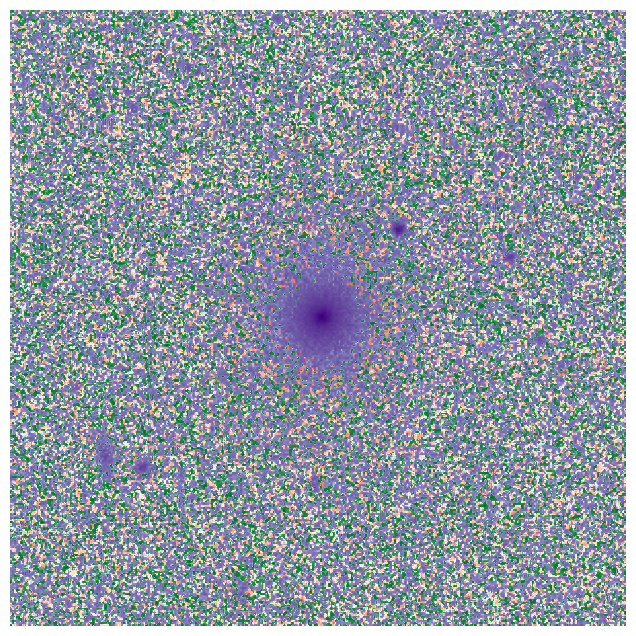

In [41]:
split = np.array_split(df_elipticas, 10)
df_temp = df_elipticas.index.drop_duplicates(keep='first')
images_elipticas = {}
initial = 0
for index, row in df_elipticas[200:].iterrows():
    if (initial < 20):
        try:
            coords_gx = SkyCoord(row.ra, row.dec, unit=(u.deg, u.deg))
            img = SkyView.get_images(position=coords_gx, survey=['SDSSg'
            ,'SDSSi','SDSSr', 'SDSSu', 'SDSSz'])
            initial += 1
            if initial>7:
                break
            print(f">>> successfull downloading image {initial}")
            for i in range(len(img)):
                band = img[i][0].header['SURVEY'].strip()
                print(band)
                cmap = color_maps.get(band, 'Blues')
                plt.imshow(img[i][0].data, cmap=cmap, norm=LogNorm(), origin='lower')
                plt.axis('off')
                plt.gca().set_frame_on(False)
                plt.gcf().set_size_inches(8, 8)
                plt.savefig(f'elipticas{initial}-band{band}.jpg', format='jpg',bbox_inches='tight', pad_inches=0)
        except:
            continue

>>> successfull downloading image 1
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 2
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 3
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 4
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 5
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 6
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 7
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


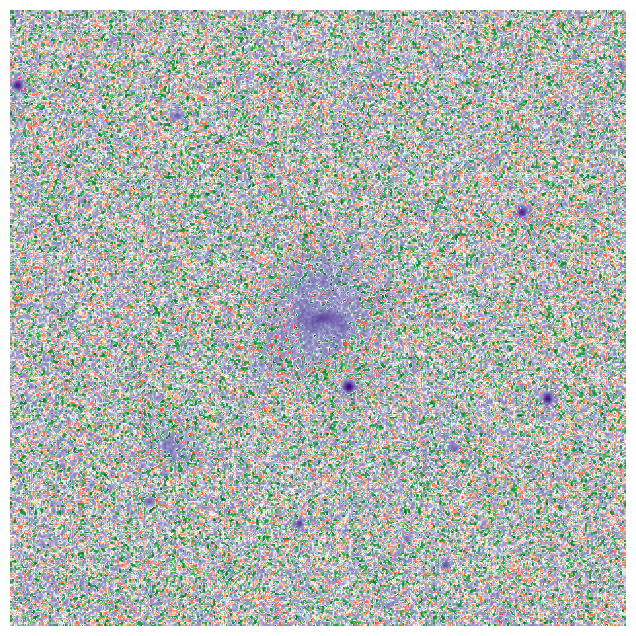

In [42]:
split = np.array_split(df_spiral, 10)
df_temp = df_spiral.index.drop_duplicates(keep='first')
images_spiral = {}
initial = 0
for index, row in df_spiral[200:].iterrows():
    if (initial < 20):
        try:
            coords_gx = SkyCoord(row.ra, row.dec, unit=(u.deg, u.deg))
            img = SkyView.get_images(position=coords_gx, survey=['SDSSg',
            'SDSSi','SDSSr', 'SDSSu', 'SDSSz'])
            initial += 1
            if initial>7:
                break
            print(f">>> successfull downloading image {initial}")
            for i in range(len(img)):
                band = img[i][0].header['SURVEY'].strip()
                print(band)
                cmap = color_maps.get(band, 'Blues')
                plt.imshow(img[i][0].data, cmap=cmap, norm=LogNorm(),
                origin='lower')
                plt.axis('off')
                plt.gca().set_frame_on(False)
                plt.gcf().set_size_inches(8, 8)
                plt.savefig(f'espirales{initial}-band{band}.jpg', format='jpg',
                bbox_inches='tight', pad_inches=0)
        except:
            continue


>>> successfull downloading image 1
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 2
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 3
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 4
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 5
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 6
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 7
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


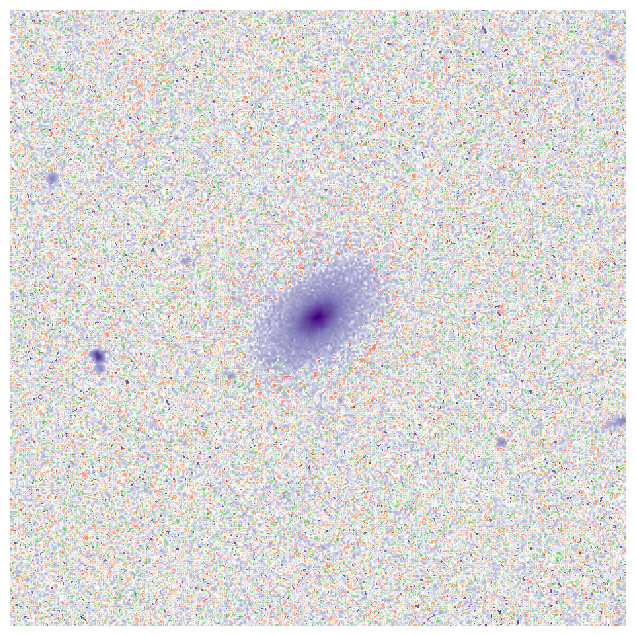

In [43]:
split = np.array_split(df_uncertain, 10)
df_temp = df_uncertain.index.drop_duplicates(keep='first')
images_uncertain = {}
initial = 0
for index, row in df_uncertain[200:].iterrows():
    if (initial < 20):
        try:
            coords_gx = SkyCoord(row.ra, row.dec, unit=(u.deg, u.deg))
            img = SkyView.get_images(position=coords_gx, survey=['SDSSg',
            'SDSSi','SDSSr', 'SDSSu', 'SDSSz'])
            initial += 1
            if initial>7:
                break
            print(f">>> successfull downloading image {initial}")
            for i in range(len(img)):
                band = img[i][0].header['SURVEY'].strip()
                print(band)
                cmap = color_maps.get(band, 'Blues')
                plt.imshow(img[i][0].data, cmap=cmap, norm=LogNorm(),
                origin='lower')
                plt.axis('off')
                plt.gca().set_frame_on(False)
                plt.gcf().set_size_inches(8, 8)
                plt.savefig(f'irregulares{initial}-band{band}.jpg', format='jpg',
                bbox_inches='tight', pad_inches=0)
        except:
            continue

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, Input, concatenate
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from tensorflow.keras.models import Model
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

In [10]:
data_dir = "images"

In [11]:
morfologies = ['elipticas', 'espirales', 'irregulares']
filters = ['SDSS-g', 'SDSS-i', 'SDSS-r', 'SDSS-u', 'SDSS-z']
num_samples = 16
combined_images = []
labels = []
for morphology in morfologies:
    combined_morphology_images = []
    for i in range(1, num_samples + 1):
        band_images = []
        labels.append(morphology)
        for filter_name in filters:
            
            image_path = (f'{data_dir}/{morphology}{i}-band{filter_name}.jpg')
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (300, 300))
            band_images.append(image)
            
               
            
        combined_morphology_images.append(np.stack(band_images, axis=-1))
        
    combined_images.extend(combined_morphology_images)


In [12]:
combined_images = np.array(combined_images)
combined_images.shape


(48, 300, 300, 5)

In [13]:
label_encoding = []
for label in labels:
    if label == "elipticas":
        label_encoding.append(0)
    if label == "espirales":
        label_encoding.append(1)
    if label == "irregulares":
        label_encoding.append(2)


In [14]:
train_labels = np.array(label_encoding)

In [15]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels_onehot = to_categorical(train_labels_encoded)

In [116]:
model = Sequential()
model.add(Conv2D(64, (7, 7), activation='relu', input_shape=(300, 300, 5)))
model.add(MaxPooling2D((5, 5)))
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(3))

In [117]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


In [118]:
len(train_labels)


48

In [119]:
model.fit(combined_images, train_labels_onehot, epochs=10, validation_split=0.1)

Epoch 1/10
2/2 [==============================] - 8s 2s/step - loss: 7.5377 - accuracy: 0.3721 - val_loss: 0.6933 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 7s 2s/step - loss: 6.1555 - accuracy: 0.3721 - val_loss: 0.1241 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 7s 2s/step - loss: 6.0263 - accuracy: 0.3721 - val_loss: 1.1921e-07 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 7s 2s/step - loss: 5.9974 - accuracy: 0.3721 - val_loss: 1.1921e-07 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 7s 2s/step - loss: 7.1219 - accuracy: 0.3721 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 7s 2s/step - loss: 10.1207 - accuracy: 0.3721 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 7s 2s/step - loss: 10.1207 - accuracy: 0.3721 - val_loss: 16.1181 - val_accuracy: 0.0000e+00


In [120]:
 model.save('modelo.h5')

In [121]:
test_dir = "images_test"


In [122]:
morfologies = ['elipticas', 'espirales', 'irregulares']
filters = ['SDSS-g', 'SDSS-i', 'SDSS-r', 'SDSS-u', 'SDSS-z']
num_samples = 8
combined_images_test = []
labels_test = []
j = 15
for morphology in morfologies:
    combined_morphology_images = []
    j=15
    for i in range(1, num_samples):
        band_images_test = []
        labels_test.append(morphology)
        for filter_name in filters:
#print(f'{morphology}/{morphology}{j}-band{filter_name}.jpg')
            image_path_test = (f'{test_dir}/{morphology}{i}-band{filter_name}.jpg')
            image_test = cv2.imread(image_path_test, cv2.IMREAD_GRAYSCALE)
            image_test = cv2.resize(image_test, (300, 300))
            band_images_test.append(image_test)
        j +=1
        combined_morphology_images.append(np.stack(band_images_test, axis=-1))
                                           
    combined_images_test.extend(combined_morphology_images)

In [123]:
combined_images_test = np.array(combined_images_test)
combined_images_test.shape


(21, 300, 300, 5)

In [124]:
labels_test

['elipticas',
 'elipticas',
 'elipticas',
 'elipticas',
 'elipticas',
 'elipticas',
 'elipticas',
 'espirales',
 'espirales',
 'espirales',
 'espirales',
 'espirales',
 'espirales',
 'espirales',
 'irregulares',
 'irregulares',
 'irregulares',
 'irregulares',
 'irregulares',
 'irregulares',
 'irregulares']

In [125]:
label_encoding_test = []
for label in labels_test:
    if label == "elipticas":
        label_encoding_test.append(0)
    if label == "espirales":
        label_encoding_test.append(1)
    if label == "irregulares":
        label_encoding_test.append(2)

In [126]:
label_encoding_test

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]

In [127]:
test_labels = np.array(label_encoding_test)

In [128]:
label_encoder = LabelEncoder()
test_labels_encoded = label_encoder.fit_transform(test_labels)
test_labels_onehot = to_categorical(test_labels_encoded)


In [129]:
loaded_model = load_model('modelo.h5')


In [130]:
predictions = loaded_model.predict(combined_images_test)

1/1 [==============================] - 1s 1s/step


In [131]:
predicted_labels = predictions.argmax(axis=1)


In [132]:
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Precisión en nuevas imágenes: {accuracy:.2f}')


Precisión en nuevas imágenes: 0.33


In [133]:
classification_rep = classification_report(test_labels, predicted_labels,target_names=morfologies)
print('Reporte de Clasificación:')
print(classification_rep)


Reporte de Clasificación:
              precision    recall  f1-score   support

   elipticas       0.00      0.00      0.00         7
   espirales       0.33      1.00      0.50         7
 irregulares       0.00      0.00      0.00         7

    accuracy                           0.33        21
   macro avg       0.11      0.33      0.17        21
weighted avg       0.11      0.33      0.17        21



C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)